In [2]:
import pandas as pd
from sqlalchemy import create_engine
from analysis_modules.user_overview import UserOverviewAnalysis
from analysis_modules.user_engagement import UserEngagementAnalysis
from analysis_modules.user_experience import UserExperienceAnalysis
from analysis_modules.user_satisfaction import UserSatisfactionAnalysis

In [6]:
db_params = {
    'dbname': 'week1',
    'user': 'postgres',
    'password': 'habte',
    'host': 'localhost',
    'port': '5432'
}

engine = create_engine(f'postgresql+psycopg2://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}:{db_params["port"]}/{db_params["dbname"]}')

sql_query = "SELECT * FROM xdr_data;"
mydata = pd.read_sql_query(sql_query, engine)

In [15]:
mydata.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
user_analysis = UserOverviewAnalysis(mydata)

In [11]:
user_analysis.aggregate_user_behaviour()

,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
Bearer Id,,,,,,,,,,,,,,,,,,,,,
6.917538e+18,4/24/2019 17:06,730.0,4/24/2019 23:55,593.0,24534.0,2.082015e+14,3.360865e+10,8.675720e+13,U78624C,429.0,...,6139644.0,2071526.0,19494278.0,14668354.0,466109357.0,5333340.0,670751043.0,15950724.0,41704610.0,500721999.0
6.917538e+18,4/27/2019 17:05,833.0,4/27/2019 23:03,699.0,21489.0,2.082014e+14,3.365905e+10,8.601480e+13,G34305A,0.0,...,10281221.0,18119976.0,19455048.0,10631652.0,673282567.0,2670856.0,501608458.0,3908870.0,38693596.0,709549265.0
6.917538e+18,4/27/2019 16:44,411.0,4/28/2019 0:27,385.0,27786.0,2.082018e+14,3.366463e+10,3.581181e+13,G89814B,1412.0,...,5385159.0,4295851.0,15755839.0,1300571.0,821879090.0,8521398.0,472846860.0,1337849.0,15548926.0,854465860.0
6.917538e+18,4/24/2019 18:59,833.0,4/24/2019 23:20,486.0,15635.0,2.082014e+14,3.365984e+10,3.544691e+13,U77782B,738.0,...,12347020.0,11089528.0,2859358.0,1738176.0,805301713.0,16257481.0,24303797.0,15907613.0,49605688.0,825786510.0
6.917538e+18,4/27/2019 16:31,3.0,4/27/2019 23:16,89.0,24264.0,2.082022e+14,3.365993e+10,3.530691e+13,G00725B,887.0,...,15231815.0,8401567.0,21563985.0,2817981.0,583864716.0,6992868.0,685122214.0,2966860.0,21983463.0,624957763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.318654e+19,4/28/2019 4:39,518.0,4/29/2019 2:53,600.0,80024.0,2.082017e+14,3.365010e+10,8.619200e+13,T70869C,55.0,...,12404964.0,4343114.0,11108134.0,21649273.0,114093049.0,2834548.0,695881178.0,3888729.0,35412664.0,145293140.0
1.318654e+19,4/28/2019 15:53,72.0,4/30/2019 8:14,962.0,145291.0,2.082010e+14,3.360966e+10,8.662640e+13,D73557B,45.0,...,22147919.0,2152449.0,21468525.0,8603105.0,328766801.0,7569327.0,371261255.0,12947410.0,36189587.0,387001634.0
1.318654e+19,4/29/2019 1:52,986.0,4/30/2019 1:52,950.0,86399.0,2.082010e+14,3.369956e+10,8.619200e+13,T62558C,46.0,...,11879062.0,1290963.0,22596930.0,11943452.0,833634251.0,10607174.0,697260277.0,9094407.0,35919460.0,872688792.0


In [12]:
user_analysis.user_device_mapping()

IMSI          MSISDN/Number
2.040471e+14  8.823971e+14     [86796204128424.0]
2.040808e+14  3.197021e+12     [86675804285257.0]
2.082001e+14  3.366047e+10     [35378106202205.0]
              3.366034e+10     [35376907771331.0]
              3.360710e+10     [35541607250461.0]
                                      ...        
2.082099e+14  3.376355e+10     [35346810765325.0]
              3.376054e+10     [35895208942525.0]
              3.376054e+10     [35910809481385.0]
              3.376154e+10     [35910809835506.0]
2.082522e+14  3.375333e+10     [35985009660496.0]
Name: IMEI, Length: 106856, dtype: object

In [13]:
user_analysis.top_10_user()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
15366,1.304243e+19,4/24/2019 18:53,213.0,4/25/2019 0:37,769.0,20652.0,2.082015e+14,3.378231e+10,3.566301e+13,D92969C,...,13285220.0,20988305.0,23231657.0,21650146.0,350061114.0,15792667.0,773955089.0,15880966.0,78331311.0,390390788.0
94412,7.277826e+18,4/27/2019 16:02,631.0,4/28/2019 0:30,450.0,30494.0,2.082017e+14,3.362931e+10,3.548291e+13,T85894A,...,18898084.0,21496079.0,12651041.0,20241581.0,438852834.0,16159797.0,126291218.0,15668536.0,77458132.0,477823073.0
127776,1.311448e+19,4/28/2019 0:12,667.0,4/30/2019 6:40,64.0,196094.0,2.082017e+14,3.363110e+10,3.520881e+13,L70873A,...,18174690.0,21633973.0,17320452.0,20196141.0,118166164.0,16399651.0,112656807.0,14814488.0,77390291.0,165432318.0
83227,7.349883e+18,4/27/2019 10:21,848.0,4/28/2019 0:16,223.0,50078.0,2.082019e+14,3.367284e+10,3.576311e+13,D17511B,...,1063201.0,20789736.0,20934470.0,21600102.0,672209315.0,14684008.0,291939818.0,15605684.0,77157382.0,700942074.0
149501,7.349883e+18,4/29/2019 7:23,311.0,4/30/2019 18:23,454.0,125994.0,2.082021e+14,3.368630e+10,3.593101e+13,D11837B,...,14197294.0,20478032.0,3361021.0,21185346.0,514665131.0,15843922.0,289552662.0,15612647.0,76916429.0,537126512.0
80799,7.277826e+18,4/27/2019 8:36,629.0,4/28/2019 1:04,627.0,59322.0,2.082015e+14,3.364897e+10,3.576541e+13,L10990C,...,6558667.0,21327215.0,1555698.0,19611751.0,450587963.0,15989751.0,221289667.0,15787570.0,76902276.0,465637863.0
15917,7.349883e+18,4/24/2019 19:03,939.0,4/25/2019 2:59,441.0,28558.0,2.082017e+14,3.366347e+10,3.585631e+13,D92799A,...,22017697.0,20590565.0,13742934.0,21948653.0,800409956.0,15587551.0,706266755.0,15354227.0,76732208.0,844150389.0
142545,1.304243e+19,4/29/2019 4:33,52.0,4/30/2019 4:33,24.0,86399.0,2.082018e+14,3.369818e+10,8.637690e+13,D21095B,...,6919557.0,20508375.0,21768377.0,21836642.0,780258014.0,14536116.0,716715935.0,16481850.0,76667292.0,818883063.0
36376,1.304243e+19,4/25/2019 1:42,317.0,4/26/2019 1:42,234.0,86399.0,2.082010e+14,3.366294e+10,8.637690e+13,T89914A,...,1799359.0,21413889.0,4691230.0,21559564.0,610997024.0,14386807.0,481947214.0,16116881.0,76607067.0,622140753.0
86568,7.277826e+18,4/27/2019 12:16,447.0,4/28/2019 5:13,425.0,61051.0,2.082015e+14,3.366155e+10,8.662480e+13,T77686B,...,1325265.0,19722578.0,18670947.0,20364218.0,517792849.0,16429849.0,207690814.0,15129525.0,76339088.0,545163569.0


In [14]:
user_analysis.application_columns()

Social Media DL (Bytes)    2.693001e+11
Gaming UL (Bytes)          1.243268e+12
dtype: float64

In [10]:
user_analysis.network_tech_distribution()

Bearer Id
1.304243e+19    16
1.304243e+19    10
1.304243e+19     9
1.304243e+19     9
1.304243e+19     9
                ..
1.311448e+19     1
1.311448e+19     1
7.277826e+18     1
1.311448e+19     1
7.349883e+18     1
Name: count, Length: 134708, dtype: int64

In [16]:
#intilize UserEngagement
engagement_analysis = UserEngagementAnalysis(db_params)

Per user total session duration:
        MSISDN/Number  Dur. (ms)
0        3.360100e+10   116720.0
1        3.360100e+10   181230.0
2        3.360100e+10   134969.0
3        3.360101e+10    49878.0
4        3.360101e+10    37104.0
...               ...        ...
106851   3.379000e+10     8810.0
106852   3.379000e+10   140988.0
106853   3.197021e+12   877385.0
106854   3.370000e+14   253030.0
106855   8.823971e+14   869844.0

[106856 rows x 2 columns]


Per user total download and upload data:
        MSISDN/Number  Total DL (Bytes)  Total UL (Bytes)
0        3.360100e+10      8.426375e+08        36053108.0
1        3.360100e+10      1.207552e+08        36104459.0
2        3.360100e+10      5.566597e+08        39306820.0
3        3.360101e+10      4.019932e+08        20327526.0
4        3.360101e+10      1.363130e+09        94280527.0
...               ...               ...               ...
106851   3.379000e+10      6.879252e+08        26716429.0
106852   3.379000e+10      4.445751e+08        35732243.0
106853   3.197021e+12      1.948281e+08        37295915.0
106854   3.370000e+14      5.396350e+08        56652839.0
106855   8.823971e+14      7.869760e+07        60456049.0

[106856 rows x 3 columns]


/home/habte/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


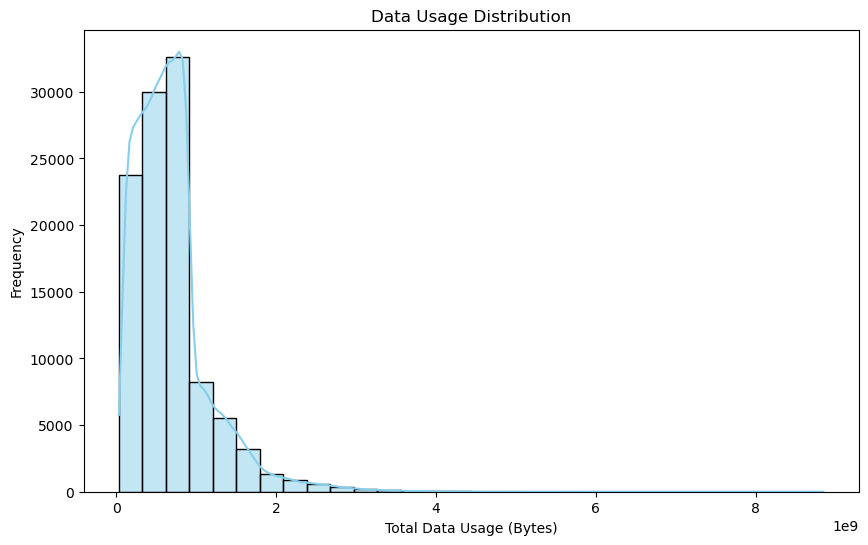

Per user total social media usage:
        MSISDN/Number  Social Media DL (Bytes)  Social Media UL (Bytes)
0        3.360100e+10                2206504.0                  25631.0
1        3.360100e+10                2598548.0                  62017.0
2        3.360100e+10                3148004.0                  47619.0
3        3.360101e+10                 251469.0                  28825.0
4        3.360101e+10                2861230.0                  51312.0
...               ...                      ...                      ...
106851   3.379000e+10                 234320.0                  65863.0
106852   3.379000e+10                 442214.0                  56355.0
106853   3.197021e+12                 668596.0                  46628.0
106854   3.370000e+14                 496337.0                  25229.0
106855   8.823971e+14                1500145.0                  45943.0

[106856 rows x 3 columns]


In [18]:
engagement_analysis.perform_analysis()

In [25]:
#intilize
user_experience_analysis = UserExperienceAnalysis(db_params)

In [26]:
user_experience_analysis.aggregate_average_rtt()

,MSISDN/Number,Avg RTT DL (ms)
0,3.360100e+10,46.0
1,3.360100e+10,30.0
2,3.360100e+10,NaN
3,3.360101e+10,69.0
4,3.360101e+10,57.0
...,...,...
106851,3.379000e+10,42.0
106852,3.379000e+10,34.0
106853,3.197021e+12,NaN
106854,3.370000e+14,NaN
